<h1>Regresión Lineal Ordinaria (LSS)</h1>

<h2>Construcción del dataframe</h2>

<p>a) Se hace uso de la cuarta línea, porque los datos eliminados son inutiles para realizar la regresión (no son númericos o son números de registros) </p>

In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<p>b) Descripción: 18 caracteristicas, 5 float, 13 int. </p>

In [27]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<p>c) Normalización y trasformación: Importancia de hacer esto</p>

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price'])

<p>d) Regresión lineal de mínimos cuadrados básica y explicación </p>

In [29]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))#Explicar esto
y = df_scaled['price']
#Mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

<p>e) Z-Score </p>


In [38]:
print(linreg.coef_) #estos son los b_j
coefs = linreg.coef_
suma = 0
valores = Xtrain.values
ygorro = linreg.predict(Xtrain)
for i in range(len(ytrain)):
    sig = ytrain[i] - ygorro[i]
    suma+= sig*sig
Sigma = np.sqrt(suma/(len(ytrain)-1))
print("desviacion estandar:"+ str(Sigma))
XtX = np.dot(np.transpose(Xtrain),Xtrain)#X tranpuesta punto X
XtX_inv = np.linalg.inv(XtX)#Invertida de lo anterior
Zscore = []
n = limit
for i in range(len(coefs)):
    score = coefs[i]/(Sigma*np.sqrt(XtX_inv[i][i]))
    Zscore.append(score)
Zscore2=map(abs,Zscore)
sum2 =sum(Zscore2)
caracteristicas=['bedrooms', 'bathrooms','sqft_living','sqft_lot',         
                 'floors','waterfront','view','condition','grade', 
                 'sqft_above','sqft_basement','yr_built','yr_renovated',
                 'lat','long','sqft_living15','sqft_lot15']
for i in range(len(caracteristicas)):
    print(caracteristicas[i]+': '+str((Zscore2[i])/sum2))

for i in range(len(caracteristicas)):
    i = int(i)
    print("Z=0.95")
    print(str(coefs[i])+': ['+str(coefs[i]-1.645*np.sqrt(XtX_inv[i][i])*Sigma) +', '+str(coefs[i]+1.645*np.sqrt(XtX_inv[i][i])*Sigma)+']')
    if coefs[i]>coefs[i]-1.645*np.sqrt(XtX_inv[i][i])*Sigma and coefs[i]<coefs[i]+1.645*np.sqrt(XtX_inv[i][i])*Sigma:
        print(caracteristicas[i]+" true")
    else:
        print(caracteristicas[i]+" false")
        
    print("ZScore")
    print(str(coefs[i])+': ['+str(coefs[i]-Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma) +', '+str(coefs[i]+Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma)+']')
    if coefs[i]>coefs[i]-Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma and coefs[i]<coefs[i]+Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma:
        print(caracteristicas[i]+" true")
    else:
        print(caracteristicas[i]+" false")

[ -7.12459371e-03   5.70425381e-02  -3.54349922e+12   2.24926907e-02
   3.71899891e-02   3.33063587e-02   4.24233606e-02   4.57586743e-02
   1.84423000e-01   3.19491406e+12   1.70752884e+12  -1.10107422e-01
   1.46484375e-02   1.85791016e-01  -4.27246094e-03   8.82568359e-02
  -8.17871094e-03   1.30395203e+01]
desviacion estandar:0.25404150937
bedrooms: 3.31362650687e-08
bathrooms: 1.89389085897e-07
sqft_living: 0.333305810861
sqft_lot: 9.77614248361e-08
floors: 1.53870991703e-07
waterfront: 1.86207832501e-07
view: 2.22247357354e-07
condition: 2.63115730479e-07
grade: 6.03503483139e-07
sqft_above: 0.333305810861
sqft_basement: 0.333305810861
yr_built: 4.29267205772e-07
yr_renovated: 8.64581453421e-08
lat: 1.08478269978e-06
long: 2.1109855668e-08
sqft_living15: 3.06860073186e-07
sqft_lot15: 3.46969312481e-08
Z=0.95
-0.00712459370918: [-0.0116062140602, -0.00264297335812]
bedrooms true
ZScore
-0.00712459370918: [-0.0142491874184, 0.0]
bedrooms true
Z=0.95
0.0570425381022: [0.050764522228

<p>f) Corrección </p>


<p>g) Cross-Validation </p>

In [31]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print("Error real sin cross: "+str(mse_test))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
print("############################")
from sklearn.model_selection import KFold

### Con K=10 ###############
kf = KFold(n_splits=10)
mse_cv = 0
mse_real10 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
    
    yhat_test10 = linreg.predict(Xtest)
    mse_test10 = np.mean(np.power(yhat_test10 - ytest, 2))
    mse_real10+=mse_test10

mse_real10 /= 10
mse_cv = mse_cv / 10
print("Error real con K=10: "+str(mse_real10))
print("Error validacion con K=10: "+str(mse_cv))
print("############################")
### Con K=5 ################
kf = KFold(n_splits=5)
mse_cv = 0
mse_real5 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
    yhat_test5 = linreg.predict(Xtest)
    mse_test5 = np.mean(np.power(yhat_test10 - ytest, 2))
    mse_real5+=mse_test5

mse_real5 /= 5
print("Error real con K=5: "+str(mse_real5))
mse_cv = mse_cv / 5
print("Error validacion con K=5: "+str(mse_cv))

Error real sin cross: 0.0654124075861
############################
Error real con K=10: 0.0653438332975
Error validacion con K=10: 0.0646905656615
############################
Error real con K=5: 0.065287831397
Error validacion con K=5: 0.0646902919559


h) residuos de entrenamiento normales?

In [32]:
linreg.fit(Xtrain,ytrain)
ygorro = linreg.predict(Xtrain)
errores= np.array(ygorro - ytrain)
print(errores[:5])

[ 0.26467037  0.12518303  0.84181421 -0.37402366 -0.20138985]


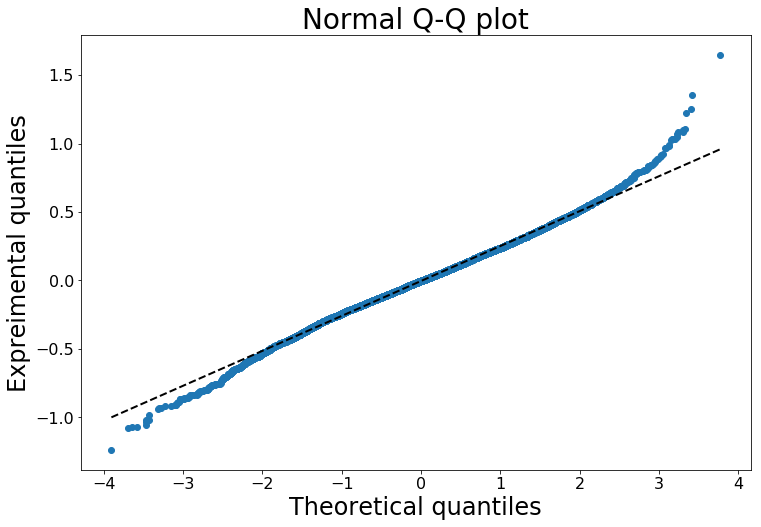

In [33]:
import numpy.random as random
import matplotlib.pyplot as plt

data=errores

data.sort()
norm=random.normal(0,1,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

In [37]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = map(abs,predictions_train - y)
            #Residuo Laplaciano // de valor absoluto
            laplace_candidate = np.mean(residuals_train)
            score_candidates.append((laplace_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mle = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
fss(Xm,ym,caracteristicas)

selected = grade ...
totalvars=2, mle = 0.302697
selected = lat ...
totalvars=3, mle = 0.249518
selected = sqft_living ...
totalvars=4, mle = 0.225651
selected = yr_built ...
totalvars=5, mle = 0.211753
selected = view ...
totalvars=6, mle = 0.206941
selected = bathrooms ...
totalvars=7, mle = 0.204301
selected = sqft_living15 ...
totalvars=8, mle = 0.202069
selected = condition ...
totalvars=9, mle = 0.200426
selected = floors ...
totalvars=10, mle = 0.198749
selected = waterfront ...
totalvars=11, mle = 0.197509
selected = sqft_lot ...
totalvars=12, mle = 0.197028
selected = bedrooms ...
totalvars=13, mle = 0.196811
selected = yr_renovated ...
totalvars=14, mle = 0.196634
selected = sqft_basement ...
totalvars=15, mle = 0.196472
selected = sqft_lot15 ...
totalvars=16, mle = 0.196463
selected = sqft_above ...
totalvars=17, mle = 0.196425
selected = long ...
totalvars=18, mle = 0.196594


[17L, 8, 13, 2, 11, 6, 1, 15, 7, 4, 5, 3, 0, 12, 10, 16, 9, 14]